## Import libraries and dependencies

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
%load_ext autoreload
%autoreload 2
import numpy as np 
from copy import deepcopy
import pandas as pd

# import csrl side of code
from csrl.oa import OmegaAutomaton



In [7]:
# import seql code
from seac.seql.lbf_train_rs import LBFTrainRS

## Train

In [8]:
run = 'default'
args=[ '--ltl', '(f & XF e)', 
      '--num_episodes', '300000', 
      '--discount_oa', '0.8', 
      '--field', '5', 
      # '--render', 'True', 
      '--run', run,
      '--env_coef', '0.2'
     ]
trainer = LBFTrainRS(args)
print(trainer.arglist)


Namespace(agents=2, batch_size=128, buffer_capacity=1000000, discount_oa=0.8, env=None, env_coef=0.2, epsilon=1.0, epsilon_anneal_slow=False, epsilon_decay=10, eval_episodes=5, eval_frequency=50, field=5, gamma=0.99, goal_epsilon=0.01, hidden_dim=128, lr=0.0001, ltl='(f & XF e)', max_episode_len=25, n_training_threads=1, num_episodes=300000, oa_coef=1.0, render=False, run='default', save_interval=100, seed=None, shared_experience=False, shared_lambda=1.0, steps_per_update=1, targets='simple', tau=0.05, training_returns_freq=100)


In [ ]:
trainer.train()

/root/.venvs/csrl/lib/python3.6/site-packages/gym/spaces/box.py:74: UserWarning: WARN: Box bound precision lowered by casting to float32
  "Box bound precision lowered by casting to {}".format(self.dtype)
/root/.venvs/csrl/lib/python3.6/site-packages/gym/spaces/box.py:74: UserWarning: WARN: Box bound precision lowered by casting to float32
  "Box bound precision lowered by casting to {}".format(self.dtype)


Observation spaces:  Tuple(Box([-1. -1.  0. -1. -1.  0. -1. -1.  0.  0.], [4. 4. 4. 4. 4. 2. 4. 4. 2. 4.], (10,), float32), Box([-1. -1.  0. -1. -1.  0. -1. -1.  0.  0.], [4. 4. 4. 4. 4. 2. 4. 4. 2. 4.], (10,), float32))
Action spaces:  Tuple(Discrete(6), Discrete(6))
Epsilon is decaying with factor 0.9999992 to 0.010 over 6000000 steps.
Observation sizes:  [10, 10]
Action sizes:  [6, 6]
Simple target computation used
Starting iterations...


/mnt/c/Users/ie3ne/Developer/quals/seac/seql/agent.py:101: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:30.)
  negative_tensor[:, available_mask] = qvals[:, available_mask]




Episode			returns			variances				exploration
0			0.000 0.040		0.000 0.006			1.000



Episode			returns			variances				exploration
50			0.000 0.000		0.000 0.000			0.999



Episode			returns			variances				exploration
100			0.040 0.080		0.006 0.026			0.999

Training progress:	episodes: 101/300000				duration: 0:0:10.71
0.03%	|>                                                  |	remaining duration: 8:49:47.50

Remove previous models
Saving intermediate models
Remove previous logs
Saving intermediate logs


Episode			returns			variances				exploration
150			0.040 0.080		0.006 0.026			0.998



Episode			returns			variances				exploration
200			0.080 0.160		0.010 0.038			0.997

Training progress:	episodes: 201/300000				duration: 0:0:22.94
0.07%	|>                                                  |	remaining duration: 9:30:15.15

Remove previous models
Saving intermediate models
Remove previous logs
Saving intermediate logs


Episode			returns			variances				exploration
250			0.000 0.000		

## Render results

In [3]:
logs_dir='logs/'
run='default'
df =pd.read_csv(logs_dir+run+'/iql_lbf_reward_shaping_lossinfo_241000.csv')  

<AxesSubplot:>

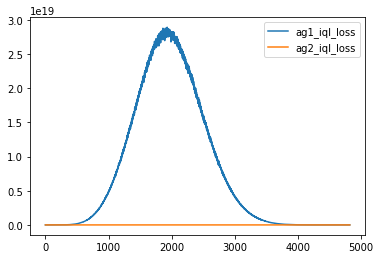

In [4]:
df[['ag1_iql_loss', 'ag2_iql_loss']].plot()

In [6]:
logs_dir='logs/'
run='default'
df2 =pd.read_csv(logs_dir+run+'/iql_lbf_reward_shaping_training_returns241000.csv')  

<AxesSubplot:ylabel='Density'>

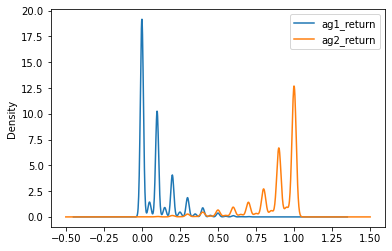

In [13]:
df2.plot.kde(x="timestep", y=["ag1_return", "ag2_return"])

## Create and Display Omega Automaton

In [3]:

# LTL Specification
ltl = '(f & XF e)'

# Translate the LTL formula to an LDBA
oa = OmegaAutomaton(ltl, extra_aps = ('f','e'))

oa

In [4]:
oa.eps

[[], [], [], []]

In [5]:
len(oa.eps[0])

0

## Debugging

In [3]:
test_args=['--lr','10', '--ltl', '(F e & FG f)']
var = LBFTrainRS(test_args)
print(var.arglist)


Namespace(agents=2, batch_size=128, buffer_capacity=1000000, env=None, epsilon=1.0, epsilon_anneal_slow=False, epsilon_decay=10, eval_episodes=5, eval_frequency=50, gamma=0.99, goal_epsilon=0.01, hidden_dim=128, lr=10.0, ltl='(F e & FG f)', max_episode_len=25, n_training_threads=1, num_episodes=120000, render=False, run='default', save_interval=100, seed=None, shared_experience=False, shared_lambda=1.0, steps_per_update=1, targets='simple', tau=0.05, training_returns_freq=100)


In [53]:
env, env_name, task_name, n, o_spaces, a_spaces, _,_= var.create_environment()

Observation spaces:  Tuple(Box([-1. -1.  0.  0.  0.  1.  0.  0.  1.  0.], [8. 8. 4. 8. 8. 2. 8. 8. 2. 4.], (10,), float32), Box([-1. -1.  0.  0.  0.  1.  0.  0.  1.  0.], [8. 8. 4. 8. 8. 2. 8. 8. 2. 4.], (10,), float32))
Action spaces:  Tuple(Discrete(7), Discrete(7))


/root/.venvs/csrl/lib/python3.6/site-packages/gym/spaces/box.py:74: UserWarning: WARN: Box bound precision lowered by casting to float32
  "Box bound precision lowered by casting to {}".format(self.dtype)


In [20]:
o_spaces

Tuple(Box([-1. -1.  0.  0.  0.  1.  0.  0.  1.  0.], [8. 8. 4. 8. 8. 2. 8. 8. 2. 4.], (10,), float32), Box([-1. -1.  0.  0.  0.  1.  0.  0.  1.  0.], [8. 8. 4. 8. 8. 2. 8. 8. 2. 4.], (10,), float32))

In [66]:
ob = var.reset_environment()
ob

(array([2., 6., 1., 3., 1., 1., 3., 0., 1.], dtype=float32), array([2., 6., 1., 3., 0., 1., 3., 1., 1.], dtype=float32))
[[2. 6. 1. 3. 1. 1. 3. 0. 1. 0.]
 [2. 6. 1. 3. 0. 1. 3. 1. 1. 0.]]


(array([[2., 6., 1., 3., 1., 1., 3., 0., 1., 0.]]),
 array([[2., 6., 1., 3., 0., 1., 3., 1., 1., 0.]]))

In [60]:
var.environment_render(plt)

NameError: name 'exit' is not defined

<Figure size 432x288 with 0 Axes>

In [58]:
# ob = np.array([[1,4,1,3,3,1,4,6,1], [1,4,1,4,6,1,3,3,1]])
var.q = 1
var.select_actions(ob)

(6, 2)
valid:  [[ True  True  True  True  True False]
 [ True  True  True  True False False]]
available:  [[ True  True  True  True  True False  True]
 [ True  True  True  True False False  True]]


AttributeError: 'LBFTrainRS' object has no attribute 'alg'